# Thomas Partey Statistical Profile

In [36]:
# Goals of this project

# Data Cleaning Part
    #1. Create and clean a database of the CDM's from the top 5 Leagues.
    #2. Database should include the defensive, passing, and misc stats
    #3. Also obtain the previous years match by match data of Thomas Partey
    #4. Final data should be as follows:
        #a. cdm_database.csv
        #b. thomas_partey.csv

# Things to plot/find/visualize
    #1. Scatter Plots:
        #a. Passing sum_val vs Defensive sum_val
        #b. Pure Passing Scatter( Accuracy vs Location of Passes)
        #c. Pure Defensive Scatter
        
    #2. Bar Plots:
        #a. TP vs Top 10 Tacklers,
        #b. TP vs Top 10 Interceptors,
        #c. TP vs Top 10 Dribbled Past,
        #d. TP vs Top 10 Ground Duels Won
        #e. TP vs Top 10 Aerial Duels Won
        #f. Year by Year Improvement of Partey (Defensive + Passing Stats)
        
    #3. Line Plots:
        #a. Consistency Evaluation (Alternate)
        
    #4. Violing Plots:
        #a. Consistency Evaluatio

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn import preprocessing

%matplotlib notebook

## Data Cleaning

In [101]:
#Defining a few variables

#Folders
DEF_STATS = 'def_stats'
PASS_STATS = 'pass_stats'
MISC_STATS = 'misc_stats'

#Leagues
LIGUE1 = 'france'
BUNDESLIGA = 'germany'
EPL = 'england'
LALIGA = 'spain'
SERIEA = 'italy'

#CDM Database
CDM_DB = 'cdm_database'

COLUMNS = [
    
    #Def stats
    'Goals',
    'Dribbled Past',
    'Tackles',
    'Errors Leading to Shots',
    'Interceptions',
    'Blocked Shots',
    
    #Pass stats
    'Accurate Pass %',
    'Accurate Passes in Own Half',
    'Accurate Passes in Opposition Half',
    'Accurate Passes in Final Third',
    'Key Passes',
    'Accurate Long Ball %',
    
    #Misc stats
    'Ground Duels %Won',
    'Aerial Duels %Won',
    'Minutes Played',
    'Was Fouled',
    'Dispossessed',
    'Matches Started',
    
]

In [102]:
#Obtaining statistics of all cdm's into one dataframe by defining functions

def get_stats(stat_name):
    #Simple method to list all files and return as dataframes
    
    stat_files = os.listdir(stat_name)
    return [pd.read_table(stat_name +'/' + file, encoding = "ISO-8859-1", header = None) for file in stat_files]

def create_dataframe(defensive, passing, misc):
    
    all_data = []
    for i in range(len(defensive)):
        
        #Find minimum length
        n = min(len(defensive[i]), len(passing[i]), len(misc[i]))
        
        def_df = defensive[i].iloc[:n].set_index([0, 1, 2])
        pas_df = passing[i].iloc[:n].set_index([0, 1, 2])
        mis_df = misc[i].iloc[:n].set_index([0, 1, 2])
        
        all_stats = pd.concat([def_df, pas_df, mis_df], axis = 'columns')
        all_stats.columns = COLUMNS
        all_data = all_data + [all_stats]
        
    all_data =  pd.concat(all_data)
    all_data = all_data.reset_index().drop([0, 1], axis = 'columns')
    all_data = all_data.rename({2:'Name'}, axis = 'columns')
    all_data = all_data.set_index(['Name'])
    return all_data

def fifa_df():
    
    STR_PERM = [
        'CM',
        'CDM',
        'CMCDM',
        'CDMCM'
    ]

    cols = [
        'Name',
        'Nationality',
        'Age',
        'Club'
    ]

    df = pd.read_table(CDM_DB +'.txt', encoding = "ISO-8859-1", header = None)
    #df = df[df[4].isin(STR_PERM)]
    df = df.drop([2, 3, 4, 6], axis = 'columns')
    df.columns = cols
    df = df.drop_duplicates()
    return df

In [103]:
#Calling the defined functions

def_stats = get_stats(DEF_STATS)
pass_stats = get_stats(PASS_STATS)
misc_stats = get_stats(MISC_STATS)

all_data = create_dataframe(def_stats, pass_stats, misc_stats)
cdm_df = fifa_df()

#Combing our stats for midfielders + list of CDM's
cdm_stats = cdm_df.join(all_data, on = 'Name', how = 'inner')
cdm_stats.to_csv(CDM_DB + '.csv', index = None)

#CDM database finalized
cdm_stats.head()

,Name,Nationality,Age,Club,Goals,Dribbled Past,Tackles,Errors Leading to Shots,Interceptions,Blocked Shots,...,Accurate Passes in Opposition Half,Accurate Passes in Final Third,Key Passes,Accurate Long Ball %,Ground Duels %Won,Aerial Duels %Won,Minutes Played,Was Fouled,Dispossessed,Matches Started
0,N'Golo Kanté,France,28,Chelsea,4.0,45.0,74.0,1.0,44.0,6.0,...,1164.0,653.0,46.0,73.0,43.0,40.0,3095.0,13.0,54.0,36.0
1,Sergio Busquets,Spain,30,FC Barcelona,0.0,48.0,90.0,1.0,54.0,8.0,...,1173.0,468.0,15.0,79.0,57.0,50.0,2719.0,54.0,25.0,30.0
2,Casemiro,Brazil,27,Real Madrid,3.0,56.0,86.0,2.0,41.0,12.0,...,669.0,223.0,14.0,75.0,55.0,62.0,2316.0,49.0,17.0,27.0
4,Ivan Rakitic,Croatia,31,FC Barcelona,3.0,25.0,30.0,0.0,51.0,8.0,...,1365.0,621.0,17.0,77.0,55.0,65.0,2643.0,53.0,23.0,29.0
5,Fernandinho,Brazil,34,Manchester City,1.0,21.0,57.0,0.0,41.0,4.0,...,1090.0,465.0,23.0,59.0,56.0,54.0,2381.0,26.0,13.0,27.0


## Implementing Goals + Visualization

In [104]:
cdm_stats.head(2)

,Name,Nationality,Age,Club,Goals,Dribbled Past,Tackles,Errors Leading to Shots,Interceptions,Blocked Shots,...,Accurate Passes in Opposition Half,Accurate Passes in Final Third,Key Passes,Accurate Long Ball %,Ground Duels %Won,Aerial Duels %Won,Minutes Played,Was Fouled,Dispossessed,Matches Started
0,N'Golo Kanté,France,28,Chelsea,4.0,45.0,74.0,1.0,44.0,6.0,...,1164.0,653.0,46.0,73.0,43.0,40.0,3095.0,13.0,54.0,36.0
1,Sergio Busquets,Spain,30,FC Barcelona,0.0,48.0,90.0,1.0,54.0,8.0,...,1173.0,468.0,15.0,79.0,57.0,50.0,2719.0,54.0,25.0,30.0


In [105]:
cdm_stats = pd.read_csv(CDM_DB + '.csv', )

#Before implementing, initialize variable to simplify
    #1. Access to df
    #2. Conditions (Minutes Played etc)
    #3. Re-organzing columns into categories

#stats that help the cdm get and keep the ball
DEFENSIVE = [
    
    'Tackles',
    'Interceptions',
    'Blocked Shots',
    'Dribbled Past',
    'Errors Leading to Shots', #Negative Correlation to defense
    'Ground Duels %Won',
    'Aerial Duels %Won',
    'Was Fouled',
    'Dispossessed' #Negative Correlation to defense

]

#stats that indicate the passing abilities
PASSING = [
    
    'Accurate Pass %',
    'Accurate Passes in Own Half', #No effect on passing ability
    'Accurate Passes in Opposition Half', #No effect on passing ability
    'Accurate Passes in Final Third', #No affect on passing ability
    'Accurate Long Ball %', #No affect on passing ability/Not a required trait
    'Key Passes'
    
]

#basic stats about player
META = [
    
    'Name',
    'Nationality',
    'Age',
    'Club',
    'Minutes Played',
    'Matches Started',
    'Goals'
    
]

In [106]:
#Before procceeding to visualize, certain constraints (minutes played)
constraint = cdm_stats[META[-3]] > 900

cdm_stats = cdm_stats[constraint]


### Defensive Scatter

In [139]:
#Manage the negatively correlated variables

df = cdm_stats.copy()
df[DEFENSIVE[-1]] = - df[DEFENSIVE[-1]]
df[DEFENSIVE[4]] = - df[DEFENSIVE[4]]

#Need to scale values to make it appropriate for comparisons

def sum_val(df, columns):
    df['sumVal'] = df[columns].sum(axis = 1)
    return df

mx = preprocessing.MinMaxScaler()
df[DEFENSIVE] = mx.fit_transform(df[DEFENSIVE])
df = sum_val(df, DEFENSIVE).sort_values('sumVal', ascending = False)
df[META + DEFENSIVE].head()

In [ ]:
#Scatter for defensive code





### Bar Plots

In [221]:
#Methods

def per90(df, string):
    df[string+'90'] = df[string] / df['Minutes Played'] * 90
    return df

def plot_top10_comparison(statistic, player, data, n, per_90):

    df = data.copy()
    if per_90:
        df = per90(df, statistic)
        statistic = statistic + '90'
    df = df.sort_values(statistic, ascending = False)


    player_index = df[df['Name'] == player].index
    idxs = df.iloc[:n].index
    data = df.loc[idxs.append(player_index)]
    
    #Plot Settings
    
    sns.set(rc={'figure.figsize':(12, 12)})

    sns.barplot(x = 'Name', y = statistic, data = data , )
    
    ax = plt.gca()
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    
    return ax

<IPython.core.display.Javascript object>


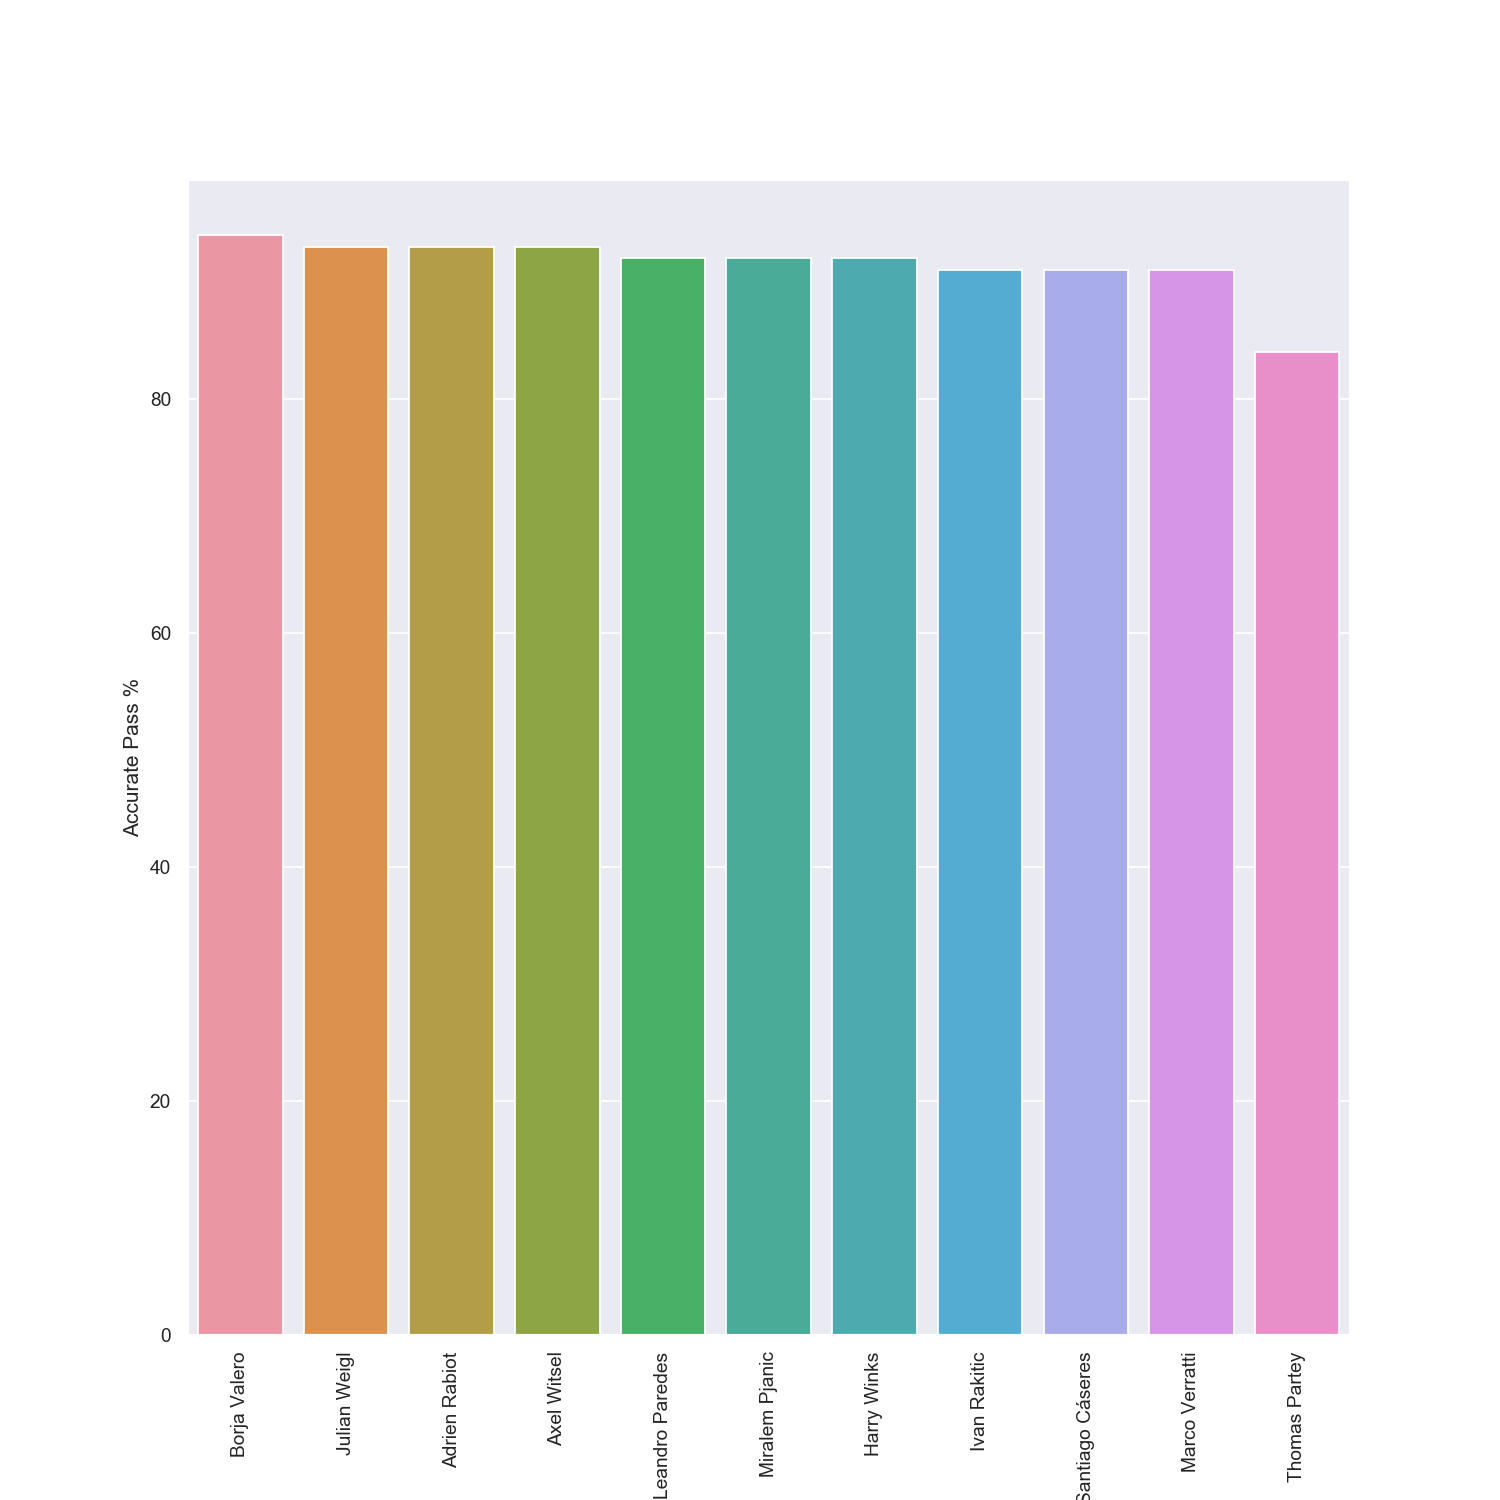

In [223]:
#Plot one-by-one for each statistic

ax = plot_top10_comparison('Accurate Pass %', 'Thomas Partey', cdm_stats, 10, per_90 = False)

In [227]:
lims = ax.get_ylim()

In [228]:
ax.get_ylim()

(0.0, 98.7)